In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from os.path import join as pjoin

In [3]:
import obr
from functionaries import *
from time_functions import stamp_Ymd
from os_functions import verify_folder_existence
from IPython.display import clear_output

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
SOURCES_FOLDER = "mcnp_output\\"
FOLDER_TO_SAVE_IMAGES = pjoin('__images', stamp_Ymd())
verify_folder_existence(FOLDER_TO_SAVE_IMAGES)

# Энергетические спектры

In [6]:
names_temp = [
              ('NP5a',  'PP5a' ),
         ('NP10a', 'PP10a'),
         ('NP15a',  'PP15a' ),
         ('NP20a', 'PP20a'),
         ('NP25a',  'PP25a'),
         ('NP30a',  'PP30a' ),
         ('NP35a',  'PP35a' ),
         ('NP40a', 'PP40a'),
         ('NP45a',  'PP45a' ),
         ('NP50a',  'PP50a' )]
#names = names_temp
names = []
for name in names_temp:
    names.append((pjoin(SOURCES_FOLDER,name[0]), pjoin(SOURCES_FOLDER, name[1])))
names = np.array(names)
names

array([['mcnp_output\\NP5a', 'mcnp_output\\PP5a'],
       ['mcnp_output\\NP10a', 'mcnp_output\\PP10a'],
       ['mcnp_output\\NP15a', 'mcnp_output\\PP15a'],
       ['mcnp_output\\NP20a', 'mcnp_output\\PP20a'],
       ['mcnp_output\\NP25a', 'mcnp_output\\PP25a'],
       ['mcnp_output\\NP30a', 'mcnp_output\\PP30a'],
       ['mcnp_output\\NP35a', 'mcnp_output\\PP35a'],
       ['mcnp_output\\NP40a', 'mcnp_output\\PP40a'],
       ['mcnp_output\\NP45a', 'mcnp_output\\PP45a'],
       ['mcnp_output\\NP50a', 'mcnp_output\\PP50a']], 
      dtype='|S17')

__images\20150428\back flow.spectrum.sample len = 5cm. mode = NP.png


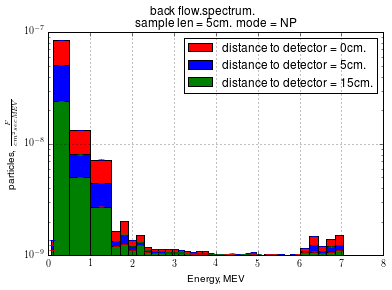

__images\20150428\back flow.spectrum.sample len = 5cm. mode = PP.png


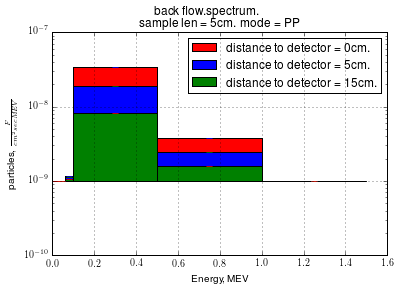

__images\20150428\back flow.spectrum.sample len = 5cm. mode = full.png


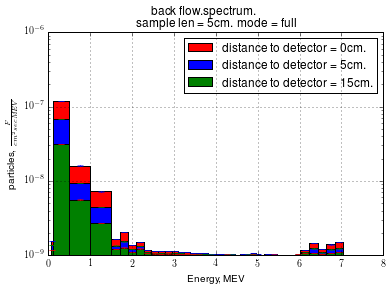

In [7]:
for name in names[:1]:
    plot_en_spectrums_in_back_going_flow(name[0],[0,5,15], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_en_spectrums_in_back_going_flow(name[1],[0,5,15], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_sum_en_spectrum_in_back_going_flow(name,[0,5,15], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    clear_output(wait=True)

# Доза излучения в обратном потоке

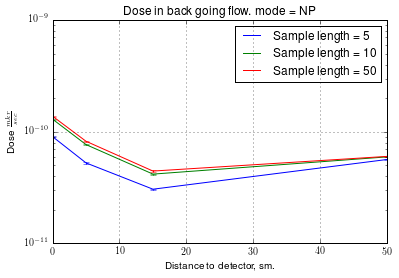

In [8]:
plot_dose_in_back_going_flow_for_each_file(names[:,0][[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

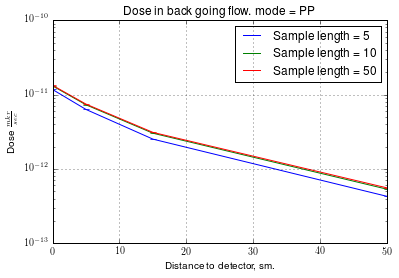

In [9]:
plot_dose_in_back_going_flow_for_each_file(names[:,1][[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

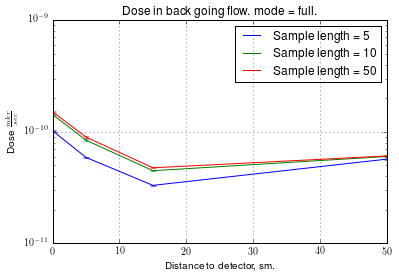

In [10]:
plot_full_dose_in_back_going_flow_for_each_file(names[[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

# Доза излучения за образцом.

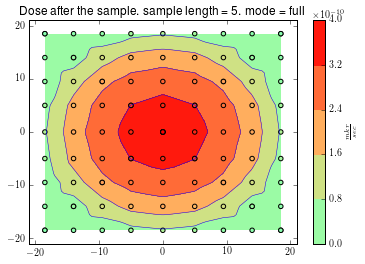

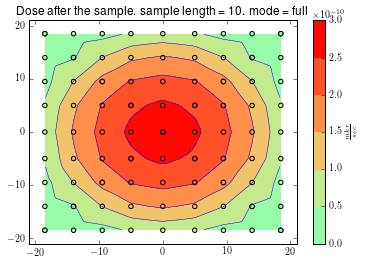

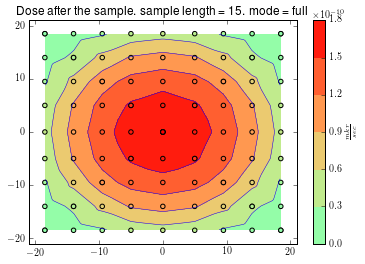

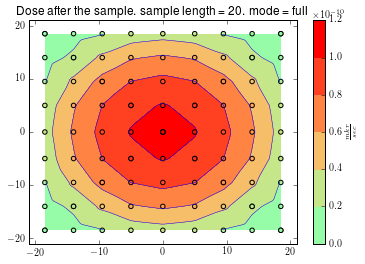

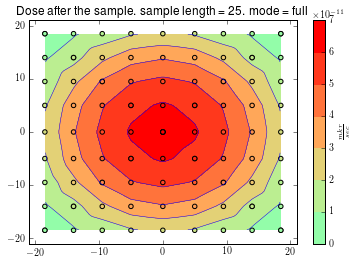

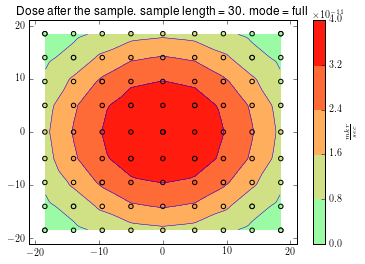

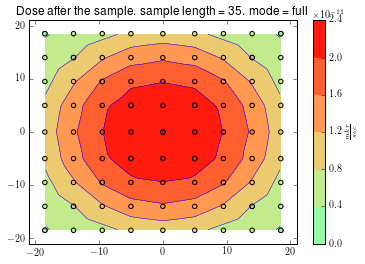

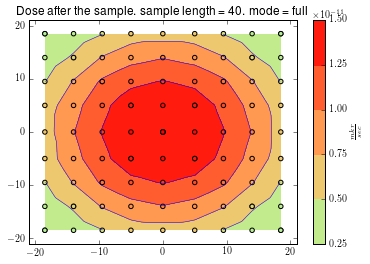

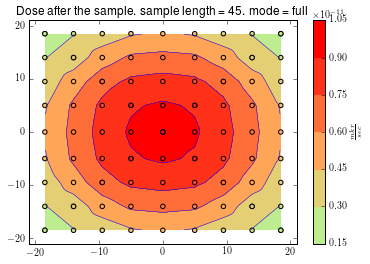

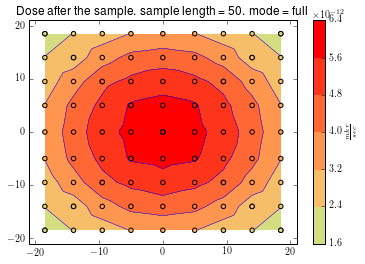

In [11]:
plot_dose_after_the_sample(names[:], FOLDER_TO_SAVE_IMAGES)

# Стенка

In [ ]:
def plot_dose_on_wall(files_names)
    fig = plt.figure(figsize=(10,12))
    names = [os.path.split(x)[1] for x in files_names]
    prefixes = [x[:2] for x in names]
    assert len(set(prefixes)) == 1, "Files are in differend modes."
    mode = prefixes[0]
    for file_ in files_names:
        tallies = obr.construct_tallies(file_)
        x = []
        y = []
        for tally in tallies:
            if tally.x == 0 and tally.y < -97:
                x.append(tally.z)
                y.append(tally.get_dose())
        x = np.array(x)
        y = np.array(y)
        if mode == 'PP':
            y = y/4.
        plt.plot(x,y,marker='o', legend=